# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

In [2]:
ames.dtypes!='object'

Id                True
MSSubClass        True
MSZoning         False
LotFrontage       True
LotArea           True
                 ...  
MoSold            True
YrSold            True
SaleType         False
SaleCondition    False
SalePrice         True
Length: 81, dtype: bool

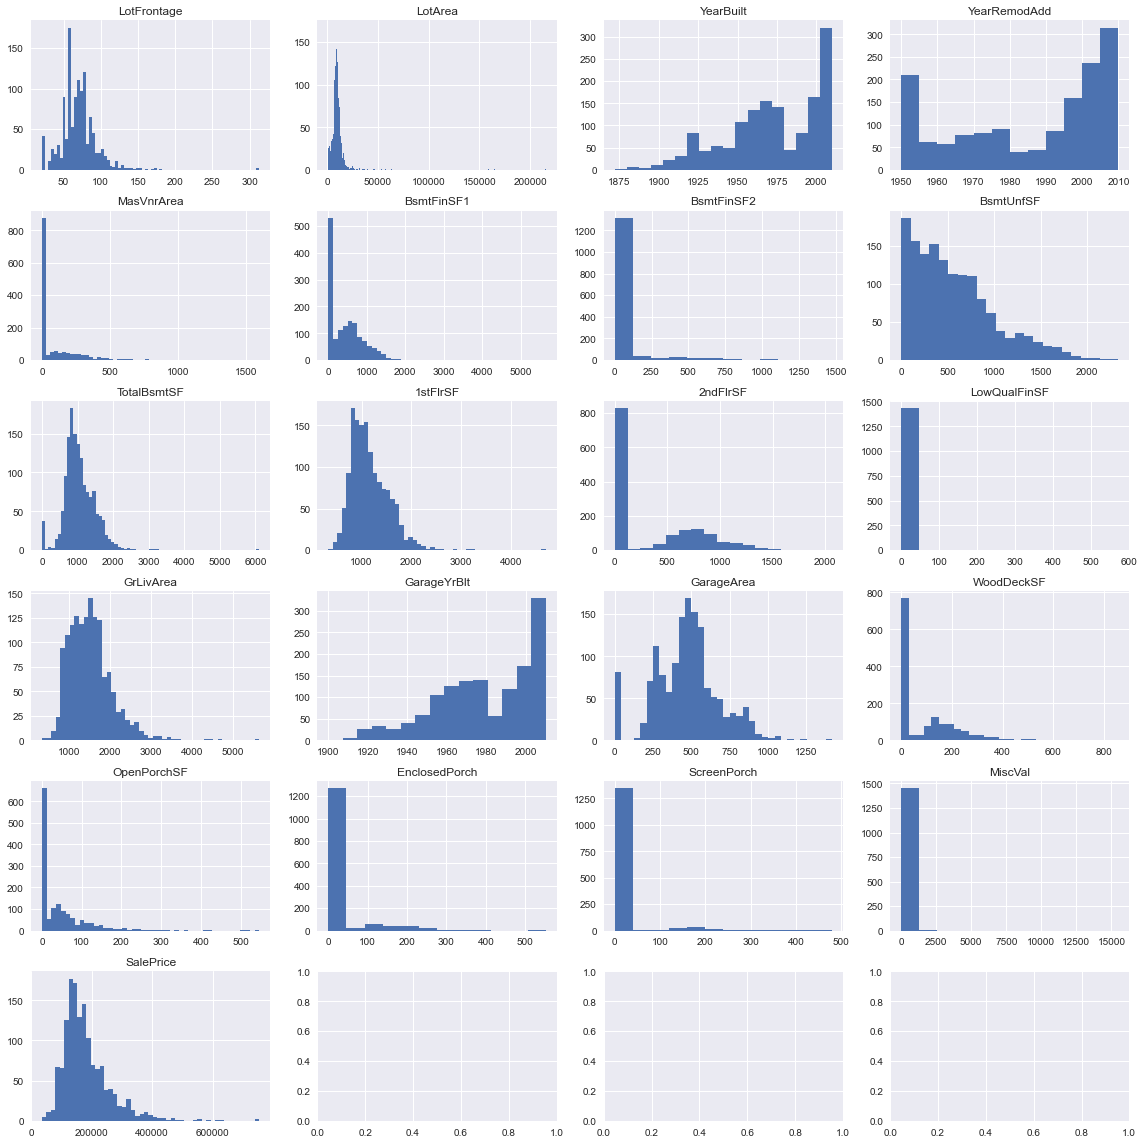

In [3]:
data = ames.loc[:, (ames.dtypes!='object')&(ames.nunique()>20)]

fig, axes = plt.subplots(6, 4, figsize=(16,16))
for ax, col in zip(axes.flat, data.columns[1:]):
    ax.hist(ames[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

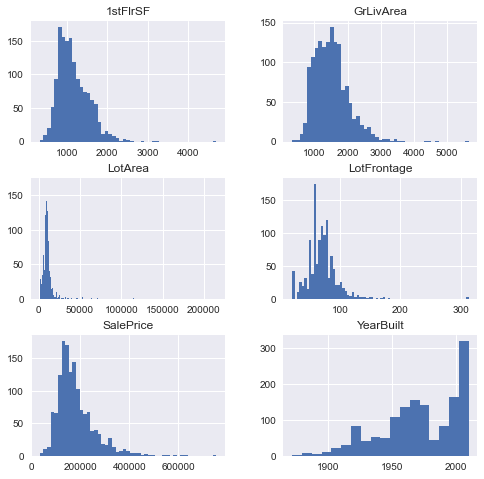

In [4]:
# Select non zero-inflated continuous features as ames_cont
continuous = ['LotFrontage', 'LotArea', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'SalePrice']
ames_cont = ames[continuous]
ames_cont.hist(bins='auto', figsize=[8, 8])
plt.show()

## Perform log transformations for the variables where it makes sense

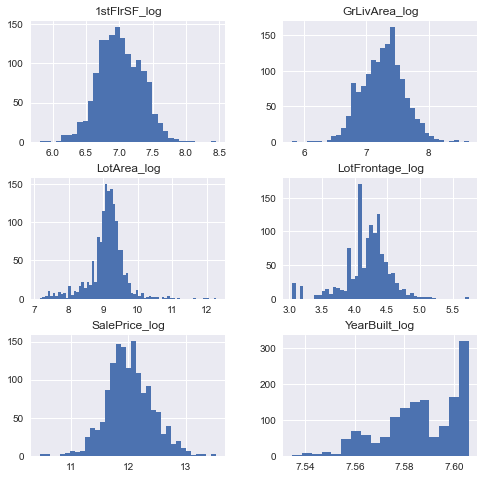

In [5]:
ames_log = np.log(ames_cont)
ames_log.columns = [f'{col}_log' for col in ames_cont.columns]
ames_log.hist(bins='auto', figsize=[8, 8])
plt.show()

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

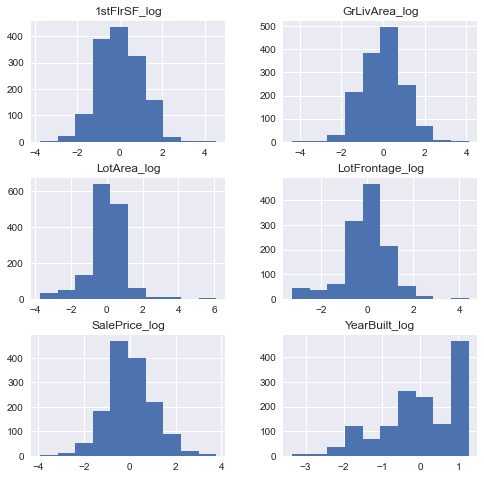

In [6]:
def normalize(feature):
    return (feature-feature.mean())/feature.std()

features_final = ames_log.apply(normalize)
features_final.hist(figsize =[8, 8])
plt.show()

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!